#**Detecting COVID ,Pneumonia or Normal Using Keras**

In [25]:
# Libraries
import os 
import cv2
import glob
import random
import matplotlib.pyplot as plt

In [26]:
# Dataset 
# https://drive.google.com/open?id=1wwXhV2pNJjGdC4dsMz3NQxfhojthUbeB

In [27]:
# Classes 
os.listdir("/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/train/")

['covid', 'pneumonia', 'normal']

#**Normal**

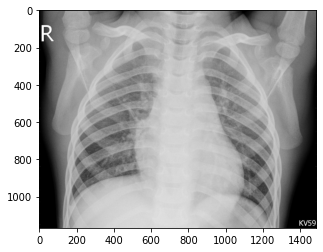

In [28]:
normal = cv2.imread("/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/normal/normal-62.jpg")
plt.imshow(normal);

#**CORONA**

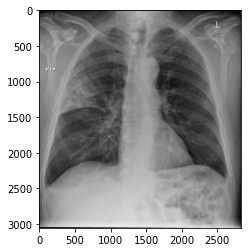

In [29]:
covid = cv2.imread("/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/covid/covid-44.jpg")
plt.imshow(covid);

#**Pneumonia**

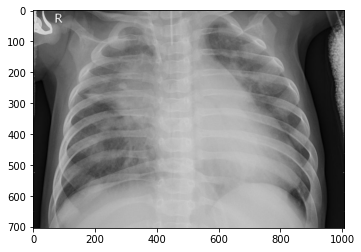

In [30]:
pneumonia = cv2.imread("/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/pneumonia/pneumonia-25.jpg")
plt.imshow(pneumonia);

In [31]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shit_range=0.1,
                               shear_range=0.2,
                               rescale = 1/255,
                               zoom_range = 0.2,
                               fill_mode = 'nearest')

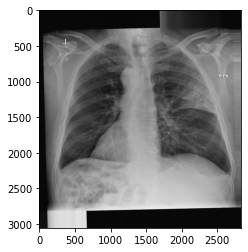

In [32]:
plt.imshow(image_gen.random_transform(covid));

In [33]:
# Train set 
image_gen.flow_from_directory("/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/train")

Found 1009 images belonging to 3 classes.


In [34]:
# Test set 
image_gen.flow_from_directory('/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test')

Found 248 images belonging to 3 classes.


#**Model**

In [35]:
# Keras 
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D



##  Convolutional Layers :
convolutional layer are the major building blocks used in CNN's . Its layers Parameters consists set of learnable filters or (kernels.      
A convolution is the simple application of a filter to an input image to detect highly specific features.

##  MaxPool layers : 
Pooling layer is another building block usually placed after the convolutional layer in CNN which is used to reduce the spatial size of the representation to reduce amount of parameters and computation in the network. Pooling operation does calculates the max or largest value in each patch of each feature map.

##  Dense layers :
Dense layer is basic layer in neural networks, it feeds all the outputs from the previous layer to its neurons, each neuron provides one output to the next layer . A Dense(10) has 10 neurons.  

##  Flatten :
Flattening is converting the data into 1-dimensional array for inputting it to the next layer .we flatten the output of the conv layers to create a single long feature vector and is connected to the final classification model which is fully connected layer.

##  Dropout :
Dropout is a regularization technique it randomely shutdowns some neurons in each iteration to improve generalization error to avoid overfitting the model.

##  Activation function : 
Activation function is put at the end of or between the neural networks to decide if the neuron is fire or not. Neurons are between 0 to 1 , more closer to 0 is less activated the neuron and more closer to 1 is more activated the neuron. Activation functions are biologically inspired by our brains , for example if we smell any fragrance some neurons get activated by sense likewise.

## Loss function : 
Loss is basically a prediction error , mathematically the diff between the actual and predicted value .Loss function is a method to calculate the loss.
There are optimizers to change the attributes of nn such as weights, learning rate etc to reduce the loss.

In [36]:
model = Sequential()

# 1st layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Dense layer
model.add(Dense(128))

# Activation Function
model.add(Activation('relu'))

# Dropout Layer :
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('sigmoid'))

# Loss Function
model.compile(loss ='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'] )

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               10616960  
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

In [39]:
# train Images 
train_image_gen = image_gen.flow_from_directory('/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/train',
                                                target_size=(150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 1009 images belonging to 3 classes.


In [40]:
# test Images
test_image_gen = image_gen.flow_from_directory('/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test',
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 248 images belonging to 3 classes.


In [41]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [42]:
results = model.fit_generator(train_image_gen, epochs=15, steps_per_epoch=75,
                              validation_data = test_image_gen, validation_steps=10)

Epoch 1/15
75/75 [==============================] - 708s 9s/step - loss: 0.8738 - accuracy: 0.5766 - val_loss: 0.6160 - val_accuracy: 0.7788
Epoch 2/15
75/75 [==============================] - 82s 1s/step - loss: 0.6321 - accuracy: 0.7283 - val_loss: 0.4292 - val_accuracy: 0.8045
Epoch 3/15
75/75 [==============================] - 78s 1s/step - loss: 0.5496 - accuracy: 0.7827 - val_loss: 0.4867 - val_accuracy: 0.8333
Epoch 4/15
75/75 [==============================] - 80s 1s/step - loss: 0.5042 - accuracy: 0.7958 - val_loss: 0.4842 - val_accuracy: 0.7928
Epoch 5/15
75/75 [==============================] - 72s 958ms/step - loss: 0.4488 - accuracy: 0.8270 - val_loss: 0.2360 - val_accuracy: 0.8429
Epoch 6/15
75/75 [==============================] - 79s 1s/step - loss: 0.4517 - accuracy: 0.8232 - val_loss: 0.3103 - val_accuracy: 0.8333
Epoch 7/15
75/75 [==============================] - 79s 1s/step - loss: 0.4355 - accuracy: 0.8221 - val_loss: 0.4346 - val_accuracy: 0.8494
Epoch 8/15
75/75

In [45]:
results.history['accuracy']

[0.57664543,
 0.72827005,
 0.7827004,
 0.7957537,
 0.8270042,
 0.8232067,
 0.8220807,
 0.8400844,
 0.84683543,
 0.85527426,
 0.8658174,
 0.8594937,
 0.856962,
 0.8717622,
 0.8687764]

# **Loss**

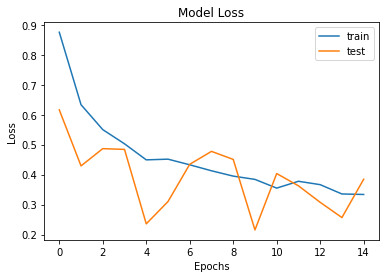

In [46]:
# Model Loss 
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

# **Accuracy**

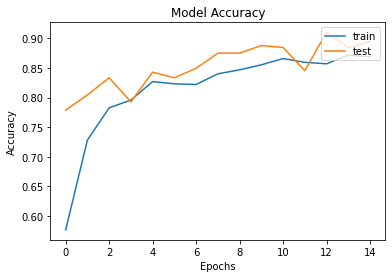

In [47]:
# Model Accuracy 
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

# **Prediction**

In [48]:
train_image_gen.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [57]:
from keras.preprocessing import image
covid_img = '/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/covid-62.jpg'
img1 = image.load_img(covid_img, target_size=(150,150))
img1 = image.img_to_array(img1)
img1 = img1/255

In [58]:
prediction1 = model.predict_classes(img1.reshape(1,150,150,3))

In [59]:
prediction1

array([0])

In [67]:
def converter(img):
  img = image.load_img(img, target_size=(150,150))
  img = image.img_to_array(img)
  img = img/255
  return img;

In [68]:
pneumonia_img = '/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/pneumonia-82.jpg'
img2 = converter(pneumonia_img)

In [69]:
prediction2 = model.predict_classes(img2.reshape(1,150,150,3))
prediction2

array([2])

In [72]:
normal_img = '/content/drive/My Drive/G_Colabs/Corona-Pneumonia-Healthy/dataset/test/normal/normal-14.jpg'
img3 = converter(normal_img)

In [73]:
prediction3 = model.predict_classes(img3.reshape(1,150,150,3))
prediction3

array([1])

In [74]:
# Save the Notbook in Jovian
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 3.8MB/s 


In [75]:
import jovian

In [76]:
jovian.commit(project='01-corona-pneumonia-normal-keras', environment='none')

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..
